In [5]:
import os
from langchain.vectorstores import DeepLake
from langchain import PromptTemplate, LLMChain
from langchain.llms import OpenAI
from langchain.embeddings.openai import OpenAIEmbeddings

In [6]:
question = "Who was the leader of Germany during the World War?"

In [7]:
llm = OpenAI(temperature=0)
template="""In only two words, please specify what the question is about. 
 The question is {question}.
"""

In [8]:
prompt = PromptTemplate(template=template, input_variables=["question"])
llm_chain = LLMChain(prompt=prompt, llm=llm)

In [9]:
topic = llm_chain.predict(question = question)
topic

'\nGermany WW2.'

In [10]:
import requests
from bs4 import BeautifulSoup

In [11]:
url_req = 'https://www.britannica.com/search?query='+topic
url_req

'https://www.britannica.com/search?query=\nGermany WW2.'

In [12]:
request_results = requests.get(url_req)

In [13]:
web_page = BeautifulSoup(request_results.text, "html.parser")

In [14]:
div_text= web_page.find("class",{"class":"RESULT-1"})
print(div_text)

None


In [15]:
for elm in web_page.select(".RESULT-1"):
    link = elm.select('a')
    subdiv = link[0]['href']
    

In [16]:
data_from = 'https://www.britannica.com' + subdiv

In [17]:
request_data = requests.get(data_from)

In [18]:
data_page = BeautifulSoup(request_data.text, "html.parser")

In [19]:
paragraphs = []
for para in data_page.select('p'):
    paragraphs.append(str(para))

In [20]:
paragraphs

['<p class="topic-paragraph">At the start of the new millennium, Germany remained a leader in <a class="md-crosslink autoxref" data-show-preview="true" href="https://www.britannica.com/place/Europe">Europe</a> and was the key to the continent’s security, stability, and prosperity. For more than 50 years, from Adenauer to Kohl, Schröder, and Merkel, Germans had played an important role in the creation of European institutions. Germany remains essential to the success of both the <a class="md-crosslink autoxref" data-show-preview="true" href="https://www.britannica.com/topic/European-Union">EU’s</a> ambitious program of economic and political <a class="md-dictionary-link md-dictionary-tt-off mw" data-term="integration" data-type="MW" href="https://www.merriam-webster.com/dictionary/integration">integration</a> and its efforts to expand to include members from the former <a class="md-crosslink autoxref" data-show-preview="true" href="https://www.britannica.com/topic/Eastern-bloc">Soviet b

In [21]:
import re
CLEANR = re.compile('<.*?>') 

def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext

In [22]:
clean_paragraphs = []

for para in paragraphs:
    clean_paragraphs.append(cleanhtml(para))

In [23]:
from langchain.text_splitter import CharacterTextSplitter

text_splitter = CharacterTextSplitter(separator = '.',chunk_size=200, chunk_overlap=0)
texts = text_splitter.create_documents(clean_paragraphs)

Created a chunk of size 213, which is longer than the specified 200
Created a chunk of size 242, which is longer than the specified 200
Created a chunk of size 218, which is longer than the specified 200
Created a chunk of size 390, which is longer than the specified 200
Created a chunk of size 471, which is longer than the specified 200
Created a chunk of size 303, which is longer than the specified 200
Created a chunk of size 202, which is longer than the specified 200
Created a chunk of size 221, which is longer than the specified 200


In [24]:
from langchain.vectorstores import DeepLake

embeddings = OpenAIEmbeddings()
db = DeepLake.from_documents(texts, embeddings)
db

C:\Users\SUKHMAN\AppData\Roaming\Python\Python310\site-packages\deeplake\util\check_latest_version.py:32: UserWarning: A newer version of deeplake (3.5.3) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


mem://langchain loaded successfully.


Evaluating ingest: 100%|██████████| 42/42 [00:04<00:00


In [25]:
ans = db.similarity_search(question,k=2)

In [26]:
ans
context = ""
for i in range(2):
    context += ans[i].page_content
    context += "\n"

In [27]:
context

'At the start of the new millennium, Germany remained a leader in Europe and was the key to the continent’s security, stability, and prosperity\nJoachim Gauck was elected president of Germany in March 2012, becoming the third person to hold that office in as many years\n'

In [28]:
template="""Your only source of knowledge is the following context. Please use only the following context to provide a suitable answer. You have to underline the important words in the answer and return the
    answer in markdown. The answer can only be in markdown.  For the underlined words, add hyperlink in the format : 'https://www.britannica.com/search?query=word'
    Context: {context}
    Question: {question}
    """

In [29]:
prompt = PromptTemplate(template=template, input_variables=["context","question"])
llm_chain = LLMChain(prompt=prompt, llm=llm)

In [30]:
llm_chain.predict(context = context, question = question)

'\nAdolf Hitler was the leader of Germany during the __[World War II](https://www.britannica.com/search?query=World%20War%20II)__.'

\nAlbert Einstein was a famous **[physicist](https://www.britannica.com/search?query=physicist)** whose research spanned from **[quantum mechanics](https://www.britannica.com/search?query=quantum%20mechanics)** to theories about **[gravity](https://www.britannica.com/search?query=gravity)** and **[motion](https://www.britannica.com/search?query=motion)**. He is generally considered the most influential physicist of the 20th century.

In [42]:
import requests

API_URL = "https://api-inference.huggingface.co/models/runwayml/stable-diffusion-v1-5"
headers = {"Authorization": f"Bearer {os.environ['BEARER_TOKEN']}"}

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.content
image_bytes = query({
	"inputs": "Giraffes",
})
# You can access the image with PIL.Image for example
import io
from PIL import Image
image = Image.open(io.BytesIO(image_bytes))

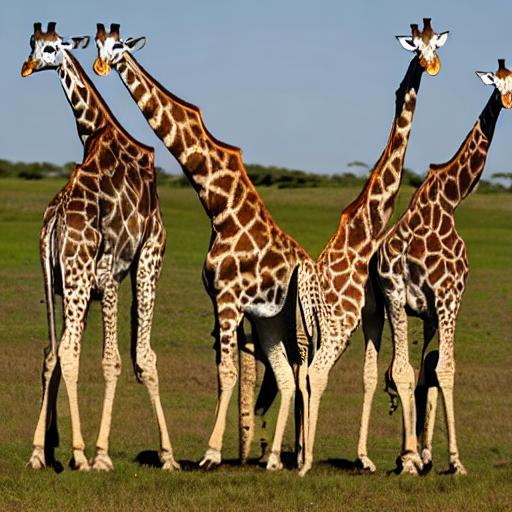

In [45]:
image